In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/Dataset_10k.csv')
df.head()

,Unnamed: 0,date,title,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,is_weekend,category
0,0,2024-10-14,"will.i.am and Fyilicia on the AI revolution, i...",Evening Standard,122,20,Monday,October,2024,4,False,Other
1,1,2024-02-21,Intel Launches World’s First Systems Foundry D...,Investor Relations :: Intel Corporation (INTC),117,18,Wednesday,February,2024,1,False,Other
2,2,2024-02-05,The Unique Challenges of Selling Enterprise AI,Emerge,54,9,Monday,February,2024,1,False,Career
3,3,2024-08-28,Contentious California AI bill passes legislat...,Reuters,88,11,Wednesday,August,2024,3,False,Other
4,4,2024-10-15,"Exploring Genius, Creation, and Humanity in th...",University of Aberdeen,82,14,Tuesday,October,2024,4,False,Other


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  10000 non-null  int64 
 1   date                        10000 non-null  object
 2   title                       10000 non-null  object
 3   source                      10000 non-null  object
 4   number_of_characters_title  10000 non-null  int64 
 5   number_of_words_title       10000 non-null  int64 
 6   day_of_week                 10000 non-null  object
 7   month                       10000 non-null  object
 8   year                        10000 non-null  int64 
 9   quarter                     10000 non-null  int64 
 10  is_weekend                  10000 non-null  bool  
 11  category                    10000 non-null  object
dtypes: bool(1), int64(5), object(6)
memory usage: 869.3+ KB


In [4]:
df.shape

(10000, 12)

In [5]:
df.duplicated().sum() # No duplicates

0

## Date Analysis
Dataset consists of new articles from NOV2023 - NOV2024 

In [6]:
# converting date to datetime format
df['date']=pd.to_datetime(df['date'])
df['Year']=df['date'].dt.year
df['Quarter']=df['date'].dt.to_period('Q')
df['Month']=df['date'].dt.to_period('M')


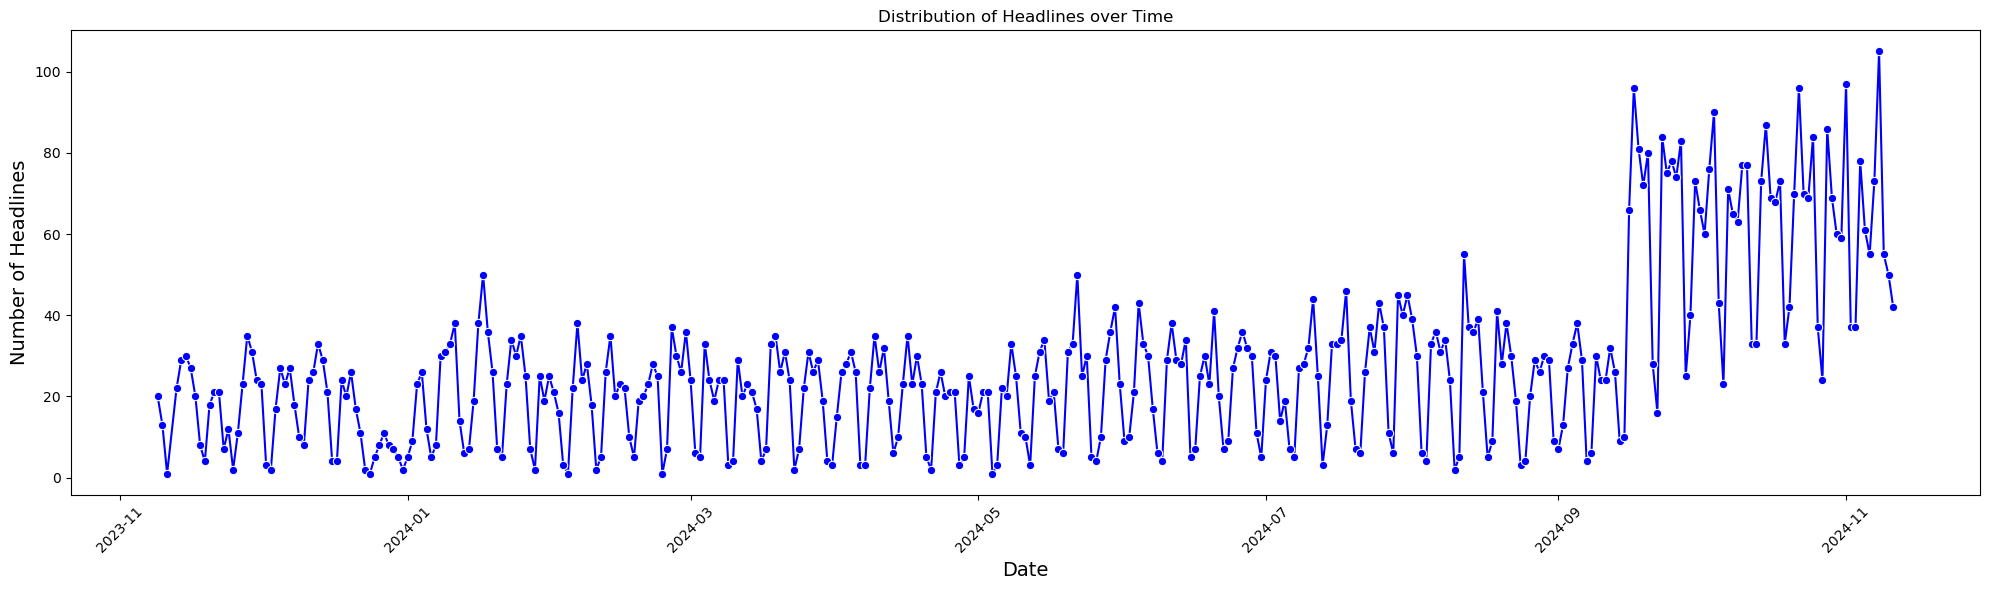

In [7]:
date_dist = df.groupby('date').size().reset_index(name='count')

plt.figure(figsize=(20,6))
sns.lineplot(data=date_dist,x='date',y='count',marker='o',color='blue')
plt.title('Distribution of Headlines over Time')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Headlines',fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

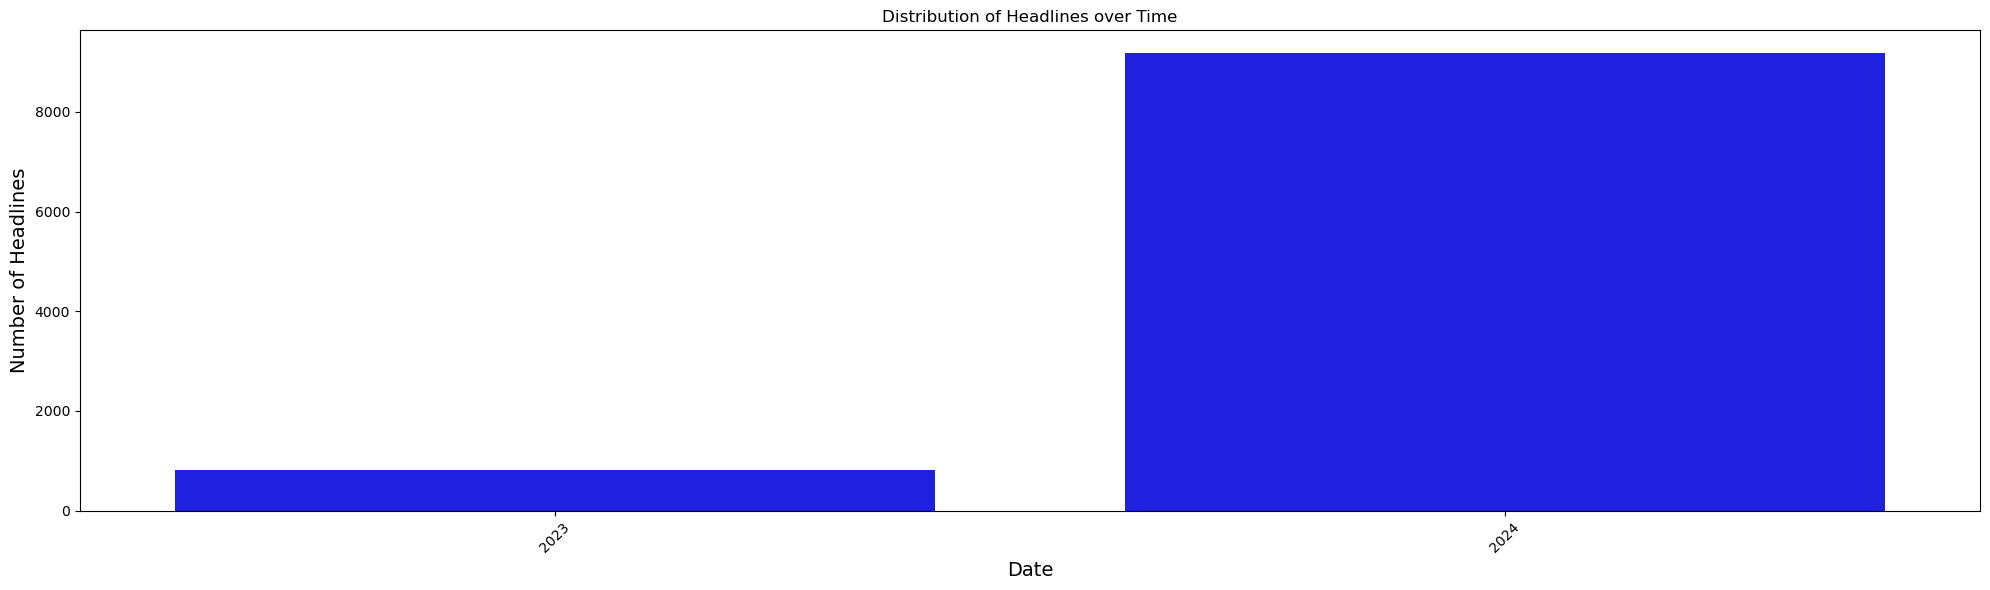

In [8]:
date_dist = df.groupby('Year').size().reset_index(name='count')

plt.figure(figsize=(20,6))
sns.barplot(data=date_dist,x='Year',y='count',color='blue')
plt.title('Distribution of Headlines over Time')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Headlines',fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

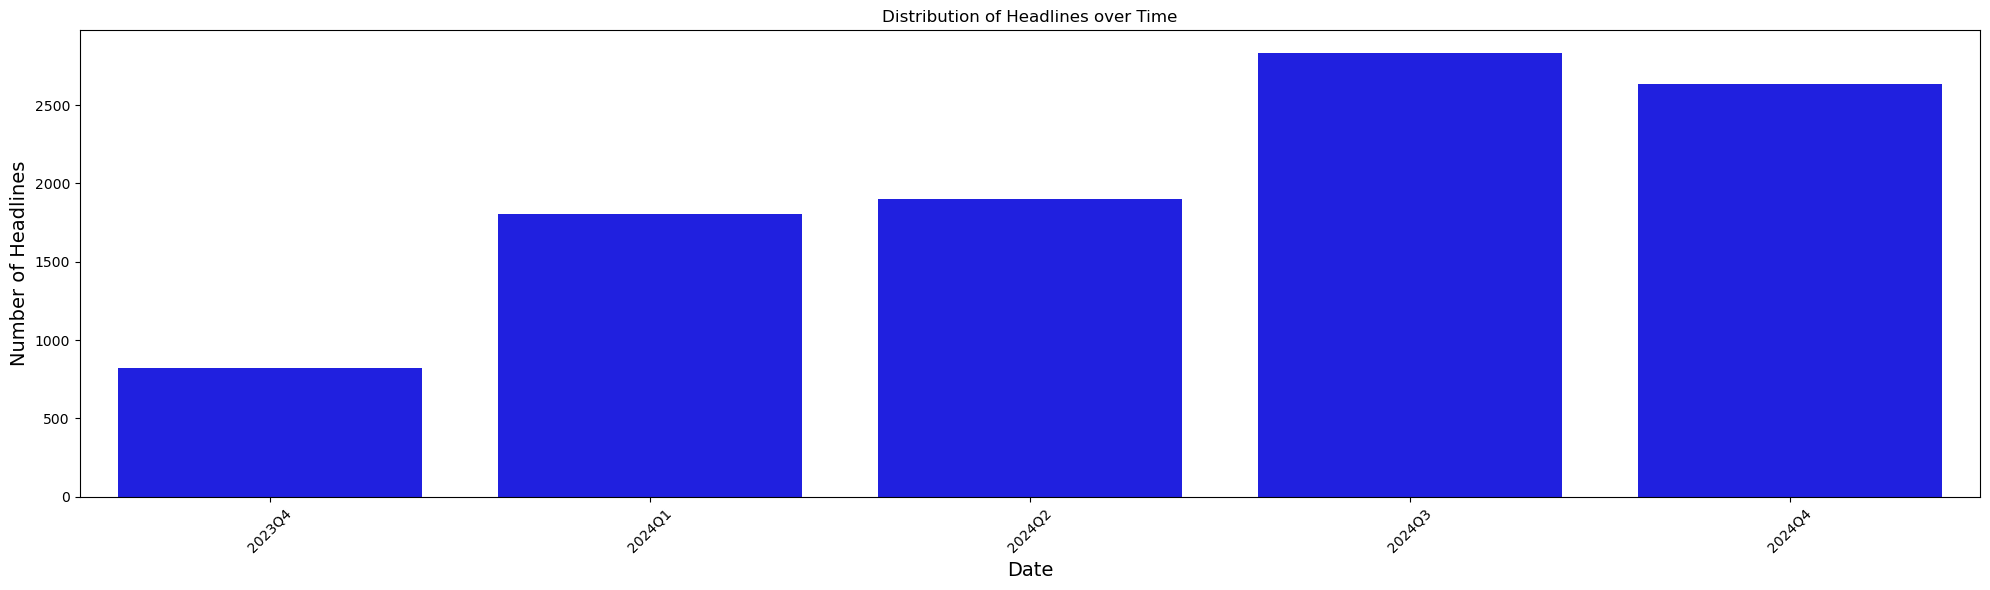

In [9]:
date_dist = df.groupby('Quarter').size().reset_index(name='count')

plt.figure(figsize=(20,6))
sns.barplot(data=date_dist,x='Quarter',y='count',color='blue')
plt.title('Distribution of Headlines over Time')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Headlines',fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

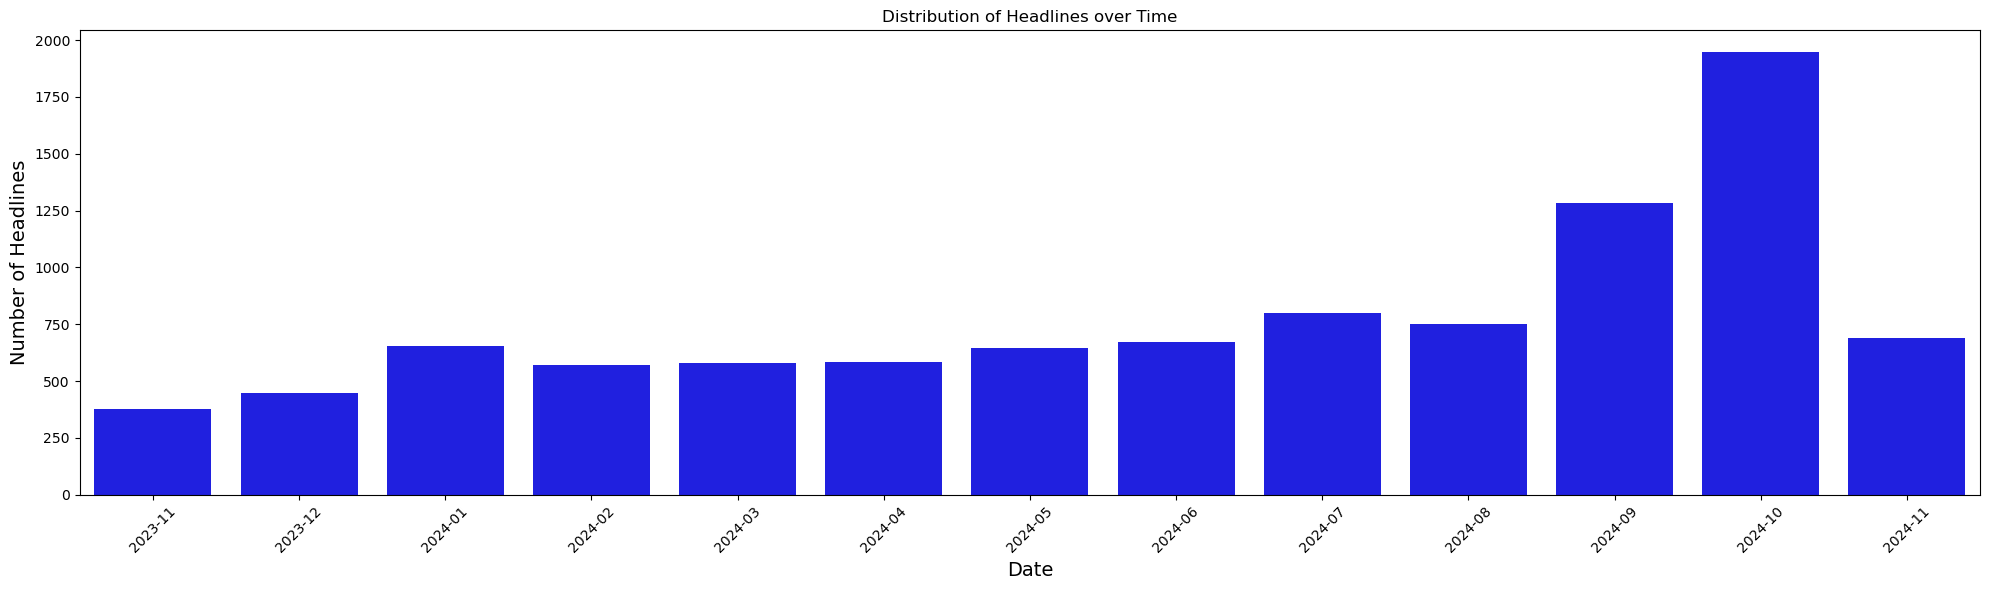

In [10]:
date_dist = df.groupby('Month').size().reset_index(name='count')

plt.figure(figsize=(20,6))
sns.barplot(data=date_dist,x='Month',y='count',color='blue')
plt.title('Distribution of Headlines over Time')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Headlines',fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Obeservations:**

## Source Analysis

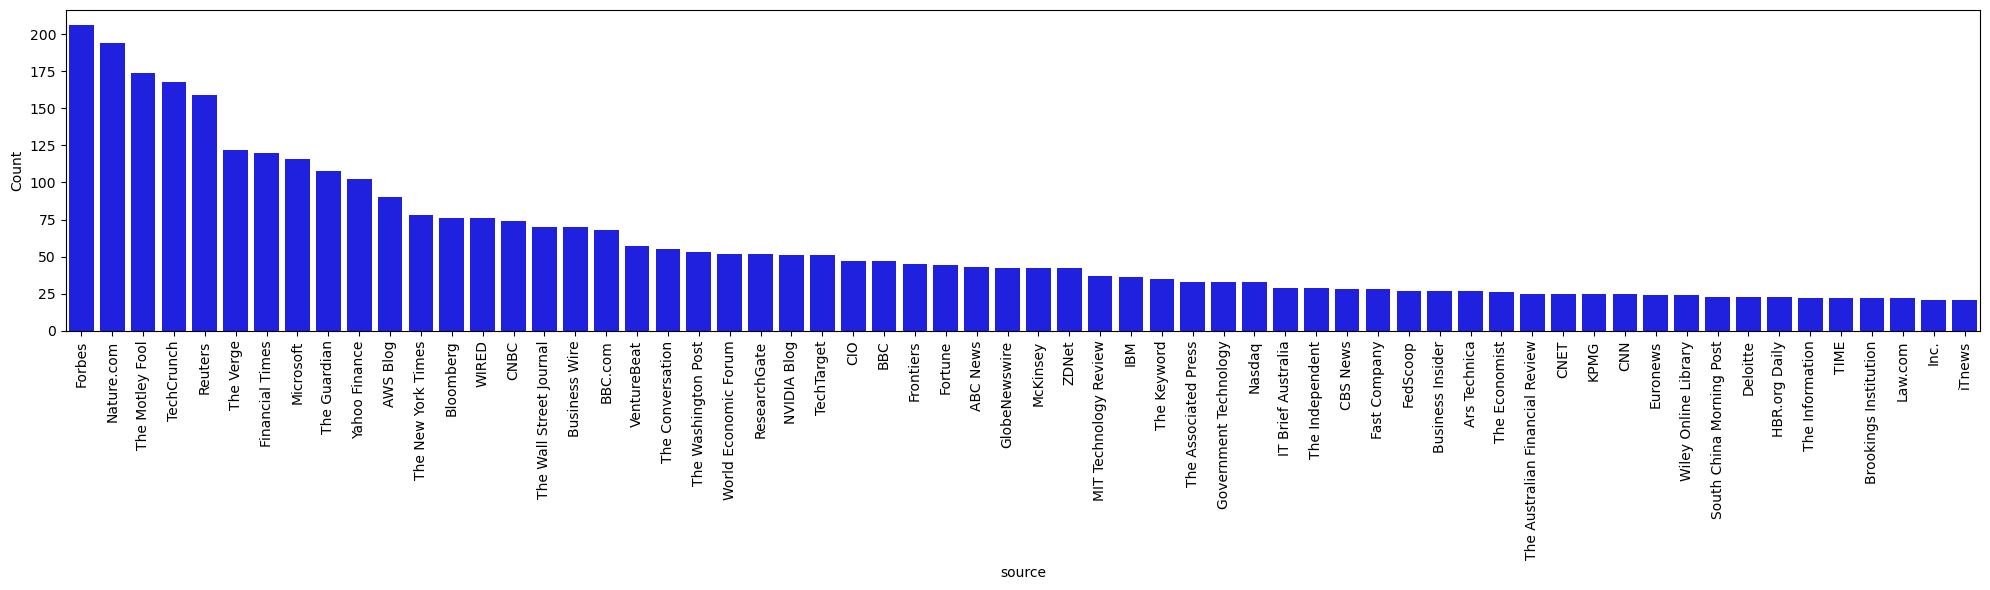

In [16]:
source_count = df['source'].value_counts().reset_index(name='Count')
plt.figure(figsize=((20,6)))
sns.barplot(data=source_count[source_count['Count']>20],x='index',y='Count',color='blue')
plt.xlabel('source')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
source_count[source_count['Count']<20]

,index,Count
63,TechRadar,19
64,PR Newswire,19
65,AI News,19
66,CBC.ca,18
67,Nextgov/FCW,18
...,...,...
2973,https://ryortho.com/,1
2974,Defence Turkey Magazine,1
2975,Watchtower IN,1
2976,The Daily Galaxy --Great Discoveries Channel,1


In [18]:
source_count[source_count['Count']>20]

,index,Count
0,Forbes,206
1,Nature.com,194
2,The Motley Fool,174
3,TechCrunch,168
4,Reuters,159
...,...,...
57,TIME,22
58,Brookings Institution,22
59,Law.com,22
60,Inc.,21


In [19]:
df.columns

Index(['Unnamed: 0', 'date', 'title', 'source', 'number_of_characters_title',
       'number_of_words_title', 'day_of_week', 'month', 'year', 'quarter',
       'is_weekend', 'category', 'Year', 'Quarter', 'Month'],
      dtype='object')

In [20]:
df['category'].value_counts()

Other        7635
Career        861
Society       767
Education     737
Name: category, dtype: int64

In [21]:
df1=pd.read_csv('datasets/berttopic1.csv')
df1.head()

,Unnamed: 0,Unnamed: 0.1,date,title,source,number_of_characters_title,number_of_words_title,day_of_week,month,year,quarter,is_weekend,category,title1,title3,title4,topic1,topic_prob1
0,0,0,2024-10-14,"will.i.am fyilicia ai revolution , inclusivity...",Evening Standard,122,20,Monday,October,2024,4,False,Other,fyilicia ai revolution inclusivity voice uk te...,fyilicia ai revolution inclusivity voice uk te...,fyilicia ai revolution inclusivity voice uk te...,-1,0.000000
1,1,1,2024-02-21,intel launch world ’ first system foundry desi...,Investor Relations :: Intel Corporation (INTC),117,18,Wednesday,February,2024,1,False,Other,intel launch world first system foundry design...,intel launch world first system foundry design...,intel launch world first system foundry design...,0,1.000000
2,2,2,2024-02-05,unique challenge selling enterprise ai,Emerge,54,9,Monday,February,2024,1,False,Career,unique challenge selling enterprise ai,unique challenge selling enterprise ai,unique challenge selling enterprise ai,-1,0.000000
3,3,3,2024-08-28,contentious california ai bill pass legislatur...,Reuters,88,11,Wednesday,August,2024,3,False,Other,contentious california ai bill pass legislatur...,contentious california ai bill pass legislatur...,contentious california ai bill pass legislatur...,5,0.896999
4,4,4,2024-10-15,"exploring genius , creation , humanity age ai",University of Aberdeen,82,14,Tuesday,October,2024,4,False,Other,exploring genius creation humanity age ai,exploring genius creation humanity age ai,exploring genius creation humanity age ai,-1,0.000000


In [29]:
pd.DataFrame(df1[['topic1','category']].groupby(['topic1','category']).size())

0
topic1 category       
-1     Career      619
       Education   523
       Other      4744
       Society     579
 0     Career       95
       Education    43
       Other      1115
       Society      29
 1     Career        3
       Education    42
       Other       358
       Society       4
 2     Career       15
       Education     3
       Other       300
       Society      11
 3     Career       28
       Education    14
       Other       223
       Society      15
 4     Career       14
       Education     2
       Other       217
       Society       3
 5     Career        2
       Education     4
       Other       109
       Society      51
 6     Career        2
       Education    99
       Other        53
       Society       8
 7     Career       12
       Education     1
       Other       141
       Society       5
 8     Education     1
       Other        98
       Society      55
 9     Career       60
       Education     3
       Other        71
       Society       5
 10    Career        4
       Education     2
       Other       113
       Society       2
 11    Career        7
       Other        93

In [48]:
a=pd.DataFrame(df[['source','category']].groupby(['source','category']).size().sort_values(ascending=False).reset_index())

In [49]:
a[a['category']=='Education']

,source,category,0
66,ResearchGate,Education,16
75,Nature.com,Education,14
100,Frontiers,Education,11
114,Education Week,Education,10
136,Forbes,Education,9
...,...,...,...
3829,INDIAai,Education,1
3831,INSIGHT Into Diversity,Education,1
3855,International Airport Review,Education,1
3877,Inria,Education,1


In [50]:
a[a['category']=='Career']

,source,category,0
28,Forbes,Career,33
39,Reuters,Career,26
44,TechCrunch,Career,25
56,Bloomberg,Career,18
62,The Wall Street Journal,Career,17
...,...,...,...
3827,IMD Business School,Career,1
3828,INDIA,Career,1
3866,InfoQ.com,Career,1
3869,InformationWeek,Career,1


In [51]:
a[a['category']=='Society']

,source,category,0
77,Microsoft,Society,14
105,Nature.com,Society,11
107,Reuters,Society,11
124,World Economic Forum,Society,10
131,TechCrunch,Society,9
...,...,...,...
3867,InfoWorld,Society,1
3868,Information Technology and Innovation Foundation,Society,1
3876,Inquirer.net,Society,1
3879,Inside Higher Ed,Society,1


In [52]:
a[a['category']=='Other']

,source,category,0
0,Nature.com,Other,168
1,The Motley Fool,Other,165
2,Forbes,Other,157
3,TechCrunch,Other,131
4,Reuters,Other,119
...,...,...,...
3874,Inside the Magic,Other,1
3875,Inquirer.net,Other,1
3880,Inside Housing,Other,1
3881,Inside Logistics,Other,1
